In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from stepmix.stepmix import StepMix
from src import LinearRegressionsMixture
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

plt.style.use("ggplot")


# Exploring Data

In [2]:
mcdonalds_df = pd.read_csv("datasets/mcdonalds.csv")
mcdonalds_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
mcdonalds_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
print(f"Shape of the dataset: {mcdonalds_df.shape}")


Shape of the dataset: (1453, 15)


In [5]:
# Extracting the segmentation variables into a separate dataframe
seg_var = mcdonalds_df.iloc[:, :11]
seg_var.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [6]:
# Converting segmentation variables to numeric values: {"Yes": 1, "No": 0}
seg_var = (seg_var == "Yes").astype(int)
seg_var.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [7]:
# Inspecting the average value of each transformed segementation variable
seg_var.mean().round(2)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [8]:
# Conducting PCA to create a perceptual map
pca = PCA()
pca.fit(seg_var)

pca_col_names = [
    "PC1",
    "PC2",
    "PC3",
    "PC4",
    "PC5",
    "PC6",
    "PC7",
    "PC8",
    "PC9",
    "PC10",
    "PC11",
]
# Printing the summary of PCA
print("Importance of components:")
display(
    pd.DataFrame(
        [
            np.sqrt(pca.explained_variance_),
            pca.explained_variance_ratio_,
            np.cumsum(pca.explained_variance_ratio_),
        ],
        columns=pca_col_names,
        index=[
            "Standard deviations",
            "Proportion of Variance",
            "Cumulative Proportion",
        ],
    ).round(5)
)

print("\nRotation matrix:")
display(
    pd.DataFrame(
        pca.components_,
        columns=seg_var.columns,
        index=pca_col_names,
    ).T.round(3)
)


Importance of components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviations,0.75705,0.60746,0.50462,0.39880,0.33741,0.31027,0.28970,0.27512,0.26525,0.24884,0.23690
Proportion of Variance,0.29945,0.19280,0.13305,0.08310,0.05948,0.05030,0.04385,0.03955,0.03676,0.03235,0.02932
Cumulative Proportion,0.29945,0.49224,0.62529,0.70839,0.76787,0.81817,0.86201,0.90156,0.93832,0.97068,1.00000



Rotation matrix:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


The loadings indicate how the original variables are combined to form principal components. Loadings guide the interpretation of principal components. In our example, the two segmentation variables with the highest loadings (in absolute terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this principal component captures the price dimension.

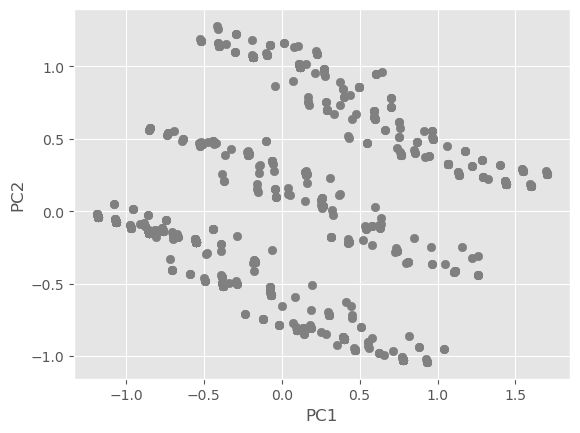

In [9]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(seg_var)

# Plotting the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# Extracting Segments

## Using k-Means

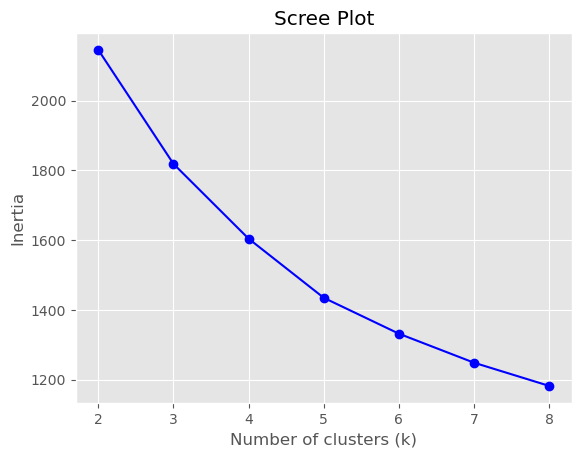

In [10]:
# Performing K-means clustering
k_range = range(2, 9)
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(seg_var)
    inertias.append(kmeans.inertia_)

# Plot the scree plot
plt.plot(k_range, inertias, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Scree Plot")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(seg_var)
kmeans_4_clusters = kmeans.predict(seg_var)


## Using Mixtures of Distributions

In [12]:
k_range = range(2, 9)
n_iter = []
converged = []
log_like = []
aic = []
bic = []
icl = []

for k in k_range:
    stepmix = StepMix(
        n_components=k,
        measurement="binary",
        verbose=0,
        random_state=1234,
        n_init=10,
        progress_bar=0,
    )
    stepmix.fit(seg_var)
    n_iter.append(stepmix.n_iter_)
    converged.append(stepmix.converged_)
    log_like.append(stepmix.lower_bound_ * len(seg_var))
    aic.append(stepmix.aic(seg_var))
    bic.append(stepmix.bic(seg_var))
    icl.append(stepmix.bic(seg_var) + stepmix.entropy(seg_var))


In [13]:
pd.DataFrame(
    {
        "iter": n_iter,
        "converged": converged,
        "logLik": log_like,
        "AIC": aic,
        "BIC": bic,
        "ICL": icl,
    },
    index=k_range,
).round(3)


,iter,converged,logLik,AIC,BIC,ICL
2,56,True,-7610.836,15267.672,15389.144,15545.602
3,183,True,-7311.478,14692.956,14877.804,15090.888
4,111,True,-7111.108,14316.216,14564.441,14841.214
5,137,True,-7011.167,14140.335,14451.937,14827.078
6,901,True,-6956.019,14054.038,14429.017,14819.134
7,571,True,-6900.136,13966.273,14404.628,14864.043
8,513,True,-6872.480,13934.960,14436.691,14971.794


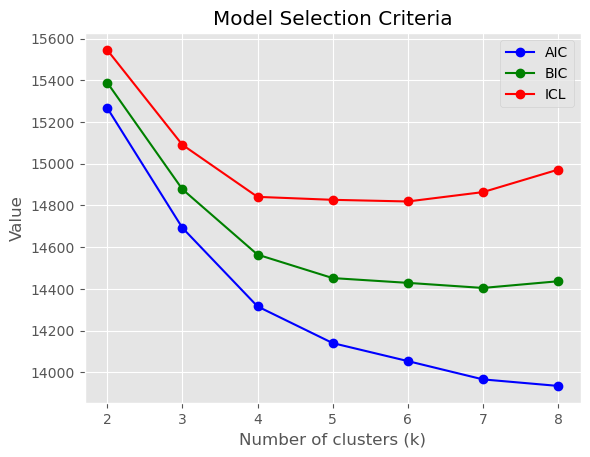

In [14]:
# Plot the AIC, BIC, and ICL values
plt.plot(k_range, aic, "bo-", label="AIC")
plt.plot(k_range, bic, "go-", label="BIC")
plt.plot(k_range, icl, "ro-", label="ICL")

plt.xlabel("Number of clusters (k)")
plt.ylabel("Value")
plt.title("Model Selection Criteria")
plt.legend()
plt.show()


The above figure plots the information criteria values AIC, BIC and ICL on the y-axis for the different number of components (segments) on the x-axis. As can be seen, the values of all information criteria decrease quite dramatically until four components (market segments) are reached.

The visual inspection of the figure suggests that four market segments might be a good solution if a more pragmatic point of view is taken; this is the point at which the decrease in the information criteria flattens visibly. We retain the four-component solution and compare it to the four-cluster k-means solution using a cross-tabulation:

In [15]:
stepmix1 = StepMix(
    n_components=4,
    measurement="binary",
    verbose=0,
    random_state=1234,
    n_init=10,
    progress_bar=0,
)
stepmix1.fit(seg_var)
md_4_clusters = stepmix1.predict(seg_var)

pd.crosstab(kmeans_4_clusters, md_4_clusters, rownames=["kmeans"], colnames=["mixture"])


mixture,0,1,2,3
kmeans,,,,
0,0,488,0,25
1,269,82,5,10
2,12,0,196,34
3,0,22,0,310


This means that the two segmentation solutions derived using very different extraction methods are actually quite similar. The result becomes even more similar if the mixture model is initialised using the segment memberships of the k-means solution:

In [16]:
stepmix2 = StepMix(
    n_components=4,
    measurement="binary",
    verbose=0,
    random_state=1234,
    n_init=10,
    progress_bar=0,
)
stepmix2.fit(seg_var, kmeans_4_clusters)
md_4_clusters = stepmix2.predict(seg_var)

pd.crosstab(kmeans_4_clusters, md_4_clusters, rownames=["kmeans"], colnames=["mixture"])


mixture,0,1,2,3
kmeans,,,,
0,505,0,0,8
1,17,337,4,8
2,0,7,225,10
3,8,0,1,323


The log-likelihood values for the two fitted mixture models obtained using the two different ways of initialisation are:

In [17]:
print(
    f"Log-likelihood for mixture model initialised using the segment memberships of the k-means solution: {stepmix2.lower_bound_ * len(seg_var)}"
)
print(
    f"Log-likelihood for mixture model not initialised using the segment memberships of the k-means solution: {stepmix1.lower_bound_ * len(seg_var)}"
)


Log-likelihood for mixture model initialised using the segment memberships of the k-means solution: -8549.717953384155
Log-likelihood for mixture model not initialised using the segment memberships of the k-means solution: -7111.108127810834


## Using Mixtures of Regression Models

In [18]:
mcdonalds_df["Like"].value_counts()


+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [19]:
mapping = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5,
}

# Converting the values in the "Like" column to integers using the mapping
mcdonalds_df["Like"] = mcdonalds_df["Like"].map(mapping)

mcdonalds_df["Like"].value_counts()


 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [20]:
X = seg_var.to_numpy(copy=True)
y = mcdonalds_df["Like"].to_numpy(copy=True)


In [21]:
# Train the model
model = LinearRegressionsMixture(X, np.expand_dims(y, axis=1), K=2)
model.train(random_restarts=10, verbose=False)


Random restarts (10/10): [####################] 100% Elapsed time: 0:00:22


In [22]:
print(model)


Model:        LinearRegressionsMixture (2 components)
Likelihood:   -2911.2067257642293
Beta:         0.6488557398004079
Lambda:       0
Pi:           [0.73857337 0.26142663]
Weights norm: [5.094614622953939, 6.232481610867825]
[[ 0.07661827 -4.08243646]
 [ 2.1031211   2.82766862]
 [ 0.41185072  0.62111661]
 [-0.08295193 -0.63772887]
 [-0.4496654  -0.59523524]
 [-0.17819942 -0.17180252]
 [ 0.42440941  0.87301516]
 [ 0.07457818 -0.03799291]
 [ 0.81632     1.10598226]
 [ 0.06420647 -0.24115251]
 [ 0.2957593   0.94922188]
 [-4.49132428  3.17167974]]


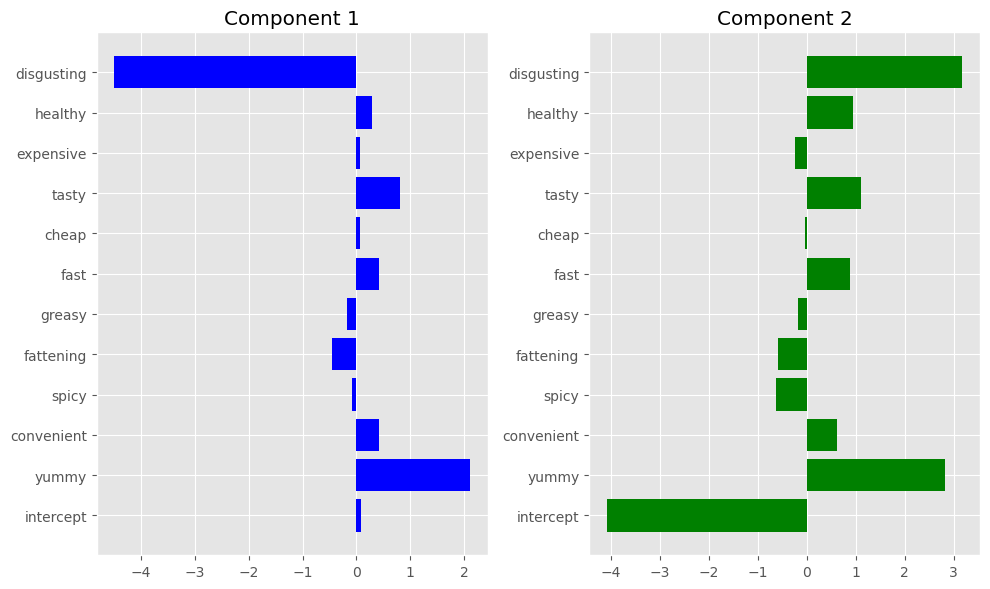

In [23]:
data = model.w
labels = [
    "intercept",
    "yummy",
    "convenient",
    "spicy",
    "fattening",
    "greasy",
    "fast",
    "cheap",
    "tasty",
    "expensive",
    "healthy",
    "disgusting",
]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first column in the first subplot
axs[0].barh(labels, data[:, 0], color="blue")
axs[0].set_title("Component 1")

# Plot the second column in the second subplot
axs[1].barh(labels, data[:, 1], color="green")
axs[1].set_title("Component 2")

plt.tight_layout()
plt.show()


## Step 6: Profiling Segments

In [24]:
k4_df = seg_var.copy()
k4_df["Cluster"] = kmeans_4_clusters
k4_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1


In [25]:
overall_means = seg_var.mean()
k4_clusters_profile = k4_df.groupby("Cluster").mean()
k4_clusters_profile


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
Cluster,,,,,,,,,,,
0,0.980507,0.982456,0.103314,0.795322,0.387914,0.961014,0.978558,0.980507,0.048733,0.376218,0.064327
1,0.019126,0.907104,0.090164,0.920765,0.595628,0.956284,0.918033,0.289617,0.021858,0.076503,0.327869
2,0.020661,0.673554,0.074380,0.917355,0.710744,0.743802,0.066116,0.086777,0.896694,0.061983,0.719008
3,0.867470,0.963855,0.096386,0.882530,0.530120,0.858434,0.048193,0.921687,0.813253,0.159639,0.078313


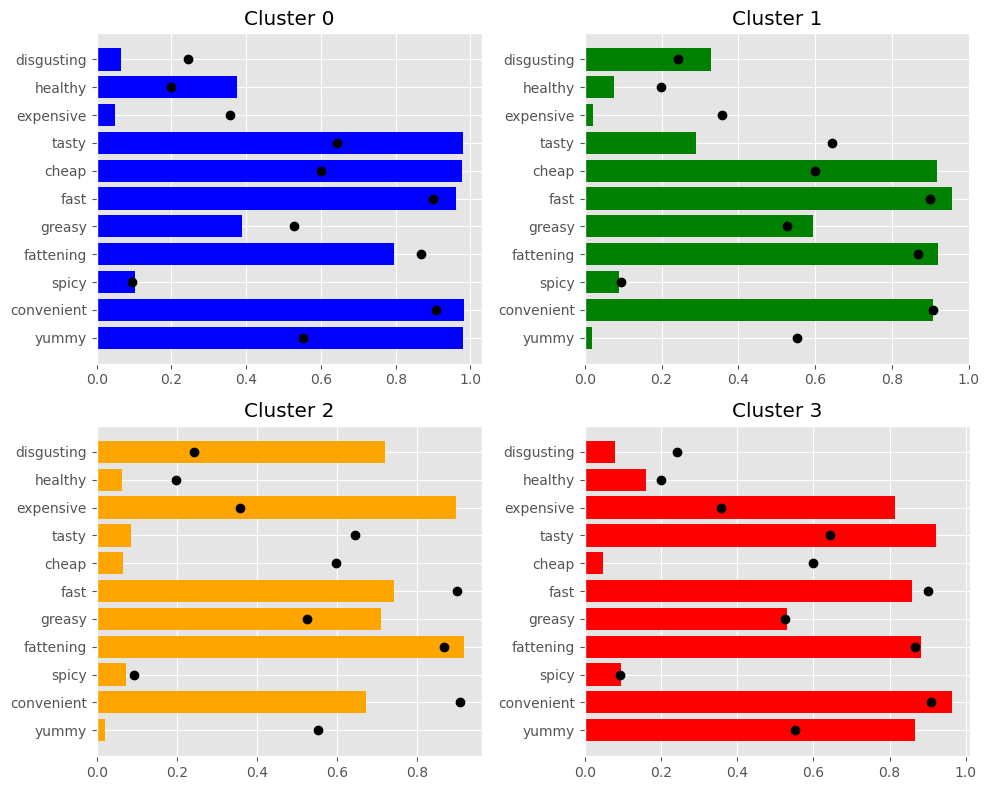

In [26]:
# Segment profile plot

clusters = [0, 1, 2, 3]
colors = ["blue", "green", "orange", "red"]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, cluster in enumerate(clusters):
    cluster_data = k4_clusters_profile.loc[cluster]

    x_labels = cluster_data.index.values

    y_values = cluster_data.values

    row = i // 2
    col = i % 2

    axs[row, col].barh(x_labels, y_values, color=colors[i])
    axs[row, col].set_title(f"Cluster {cluster}")

    axs[row, col].plot(overall_means, x_labels, "ko")

plt.tight_layout()
plt.show()


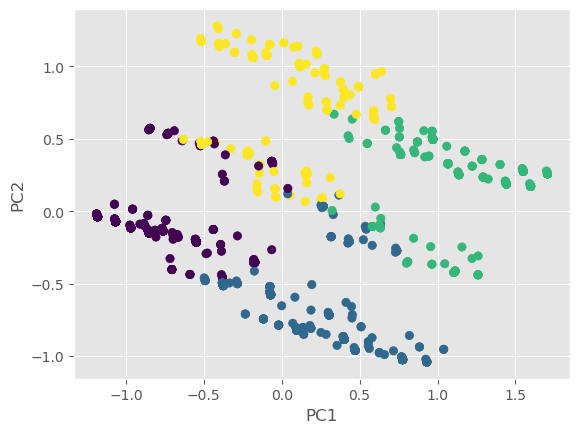

In [27]:
# Segment separation plot

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=kmeans_4_clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Step 7: Describing Segments

In [28]:
reversed_mapping = {v: k for k, v in mapping.items()}
mcdonalds_df["Like"] = mcdonalds_df["Like"].map(reversed_mapping)


In [29]:
mcdonalds_df.Like.unique()


array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

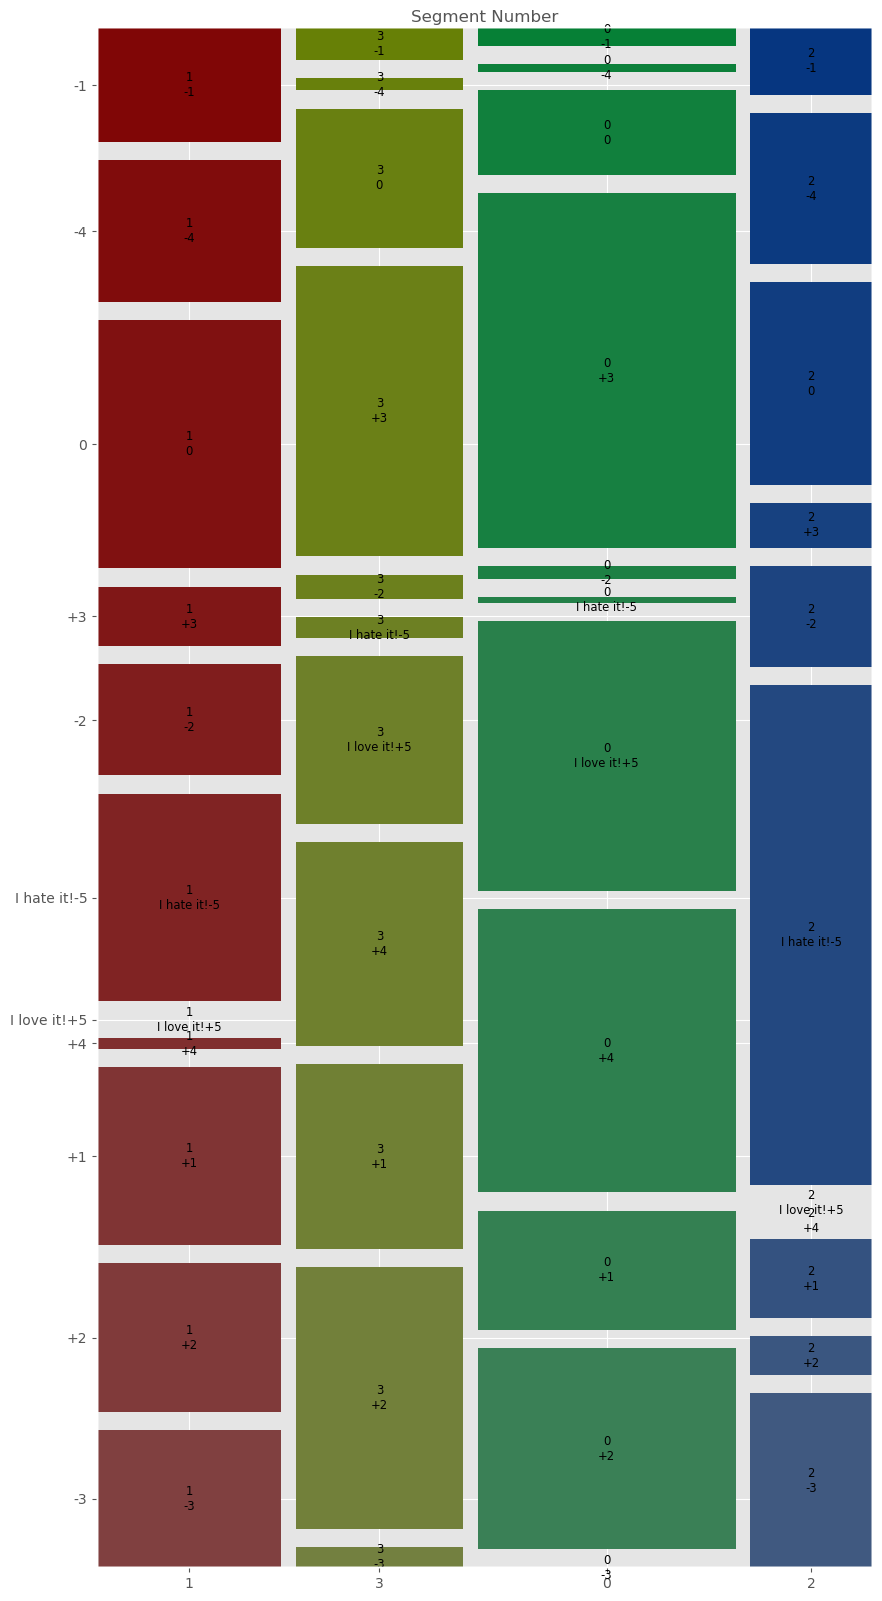

In [30]:
# Mosaic plot
contingency_table = pd.DataFrame(
    {"Cluster": k4_df["Cluster"], "Like": mcdonalds_df["Like"]}
)

# Plot the mosaic plot
fig, axes = plt.subplots(figsize=(10, 20))
mosaic(
    contingency_table,
    title="",
    axes_label=True,
    index=["Cluster", "Like"],
    ax=axes,
    gap=0.02,
)

plt.xlabel("Segment Number")
plt.show()


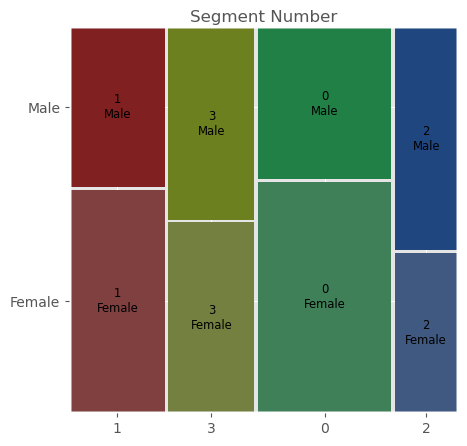

In [31]:
contingency_table = pd.DataFrame(
    {"Cluster": k4_df["Cluster"], "Gender": mcdonalds_df["Gender"]}
)

# Plot the mosaic plot
fig, axes = plt.subplots(figsize=(5, 5))
mosaic(
    contingency_table,
    title="",
    axes_label=True,
    index=["Cluster", "Gender"],
    ax=axes,
    gap=0.01,
)

plt.xlabel("Segment Number")
plt.show()


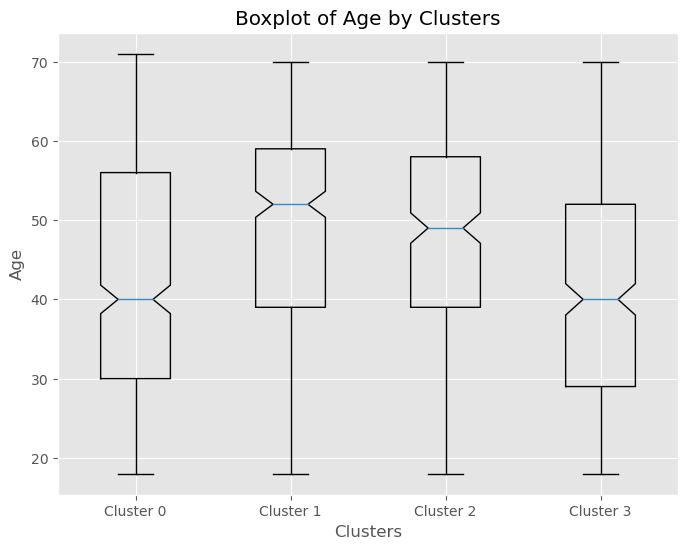

In [32]:
# Create a list of age values for each cluster
data = [
    mcdonalds_df.loc[k4_df["Cluster"] == cluster, "Age"] for cluster in [0, 1, 2, 3]
]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the boxplot
ax.boxplot(
    data, labels=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], notch=True
)

# Set the labels for x-axis and y-axis
ax.set_xlabel("Clusters")
ax.set_ylabel("Age")

# Set the title of the plot
ax.set_title("Boxplot of Age by Clusters")

# Show the plot
plt.show()


In [33]:
# Create a binary target variable based on k4 being equal to 3
k4_df["target"] = (k4_df["Cluster"] == 3).astype(int)
mcdonalds_df["Like"] = mcdonalds_df["Like"].map(mapping)
mcdonalds_df["Gender"] = mcdonalds_df["Gender"].map({"Male": 0, "Female": 1})
mcdonalds_df["VisitFrequency"] = mcdonalds_df["VisitFrequency"].map(
    {
        "Every three months": 2,
        "Once a week": 4,
        "Once a month": 3,
        "Once a year": 1,
        "More than once a week": 5,
        "Never": 0,
    }
)


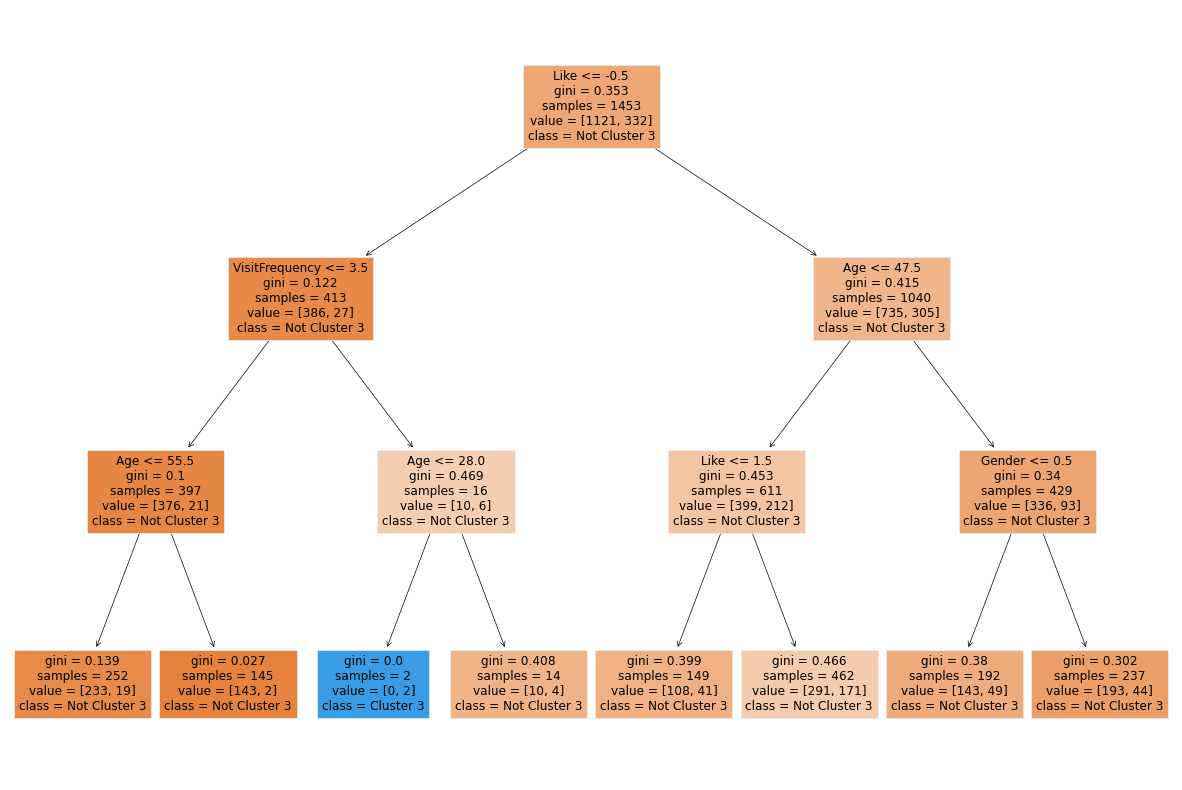

In [39]:
# Select the predictor variables
predictors = ["Like", "Age", "VisitFrequency", "Gender"]

# Fit the decision tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=3)
tree_classifier.fit(mcdonalds_df[predictors], k4_df["target"])

# Plot the decision tree
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(
    tree_classifier,
    feature_names=predictors,
    class_names=["Not Cluster 3", "Cluster 3"],
    filled=True,
    ax=ax,
)

plt.show()


In [41]:
mcdonalds_df["k4"] = kmeans_4_clusters
visit = mcdonalds_df.groupby("k4")["VisitFrequency"].mean()

# Convert the result to a dictionary
visit_dict = visit.to_dict()

# Print the mean visit frequency for each cluster
for cluster, mean_frequency in visit_dict.items():
    print(f"Cluster {cluster}: {mean_frequency}")


Cluster 0: 3.0194931773879143
Cluster 1: 1.685792349726776
Cluster 2: 1.4173553719008265
Cluster 3: 2.8734939759036147


In [42]:
like = mcdonalds_df.groupby("k4")["Like"].mean()

# Convert the result to a dictionary
like_dict = like.to_dict()

# Print the mean like rating for each cluster
for cluster, mean_frequency in like_dict.items():
    print(f"Cluster {cluster}: {mean_frequency}")


Cluster 0: 2.9200779727095516
Cluster 1: -1.2185792349726776
Cluster 2: -2.652892561983471
Cluster 3: 2.1656626506024095


In [43]:
female = mcdonalds_df.groupby("k4")["Gender"].mean()

# Convert the result to a dictionary
female_dict = female.to_dict()

# Print the proportion of females for each cluster
for cluster, mean_frequency in female_dict.items():
    print(f"Cluster {cluster}: {mean_frequency}")


Cluster 0: 0.6023391812865497
Cluster 1: 0.5819672131147541
Cluster 2: 0.41735537190082644
Cluster 3: 0.49698795180722893


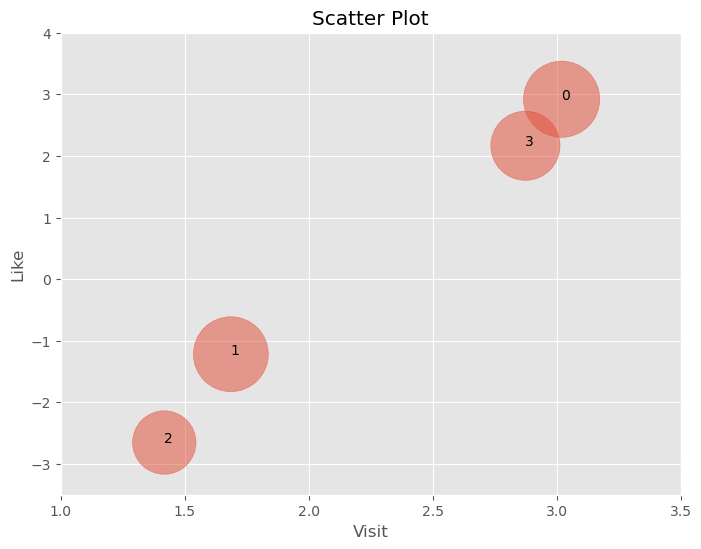

In [62]:
# Segment Evaluation Plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(visit, like, s=5000 * female, alpha=0.5)

ax.set_xlim(1, 3.5)
ax.set_ylim(-3.5, 4)

for i, (x, y) in enumerate(zip(visit, like)):
    ax.text(x, y, str(i))

ax.set_xlabel("Visit")
ax.set_ylabel("Like")
ax.set_title("Scatter Plot")
plt.show()
